# Supply

Quite often a project can have complex supply schedules. On this notebook we show an example of the mechanism called "Supply Controller". Using this controller we can define any kind of supply schedule we want, from fixed, to linear to anything else.

In [1]:
import numpy as np
import scipy
import os
import sys
tokenlab_path=os.path.abspath("").replace('notebooks','src')
sys.path.insert(0,tokenlab_path)

from TokenLab.simulationcomponents import *
from TokenLab.simulationcomponents.usergrowthclasses import *
from TokenLab.simulationcomponents.transactionclasses import *
from TokenLab.simulationcomponents.tokeneconomyclasses import *
from TokenLab.simulationcomponents.transactionclasses import *
from TokenLab.simulationcomponents.agentpoolclasses import *
from TokenLab.simulationcomponents.pricingclasses import *
from TokenLab.simulationcomponents.supplyclasses import *
from TokenLab.simulationcomponents.addons import AddOn_RandomNoise, AddOn_RandomNoiseProportional
from utils.helpers import *
from matplotlib import pyplot as plt

In [2]:
ITERATIONS=60
HOLDING_TIME=1
SUPPLY=10**10
INITIAL_PRICE=0.5

In [3]:
usm_fiat=UserGrowth_Spaced(100,54000,ITERATIONS,log_saturated_space)

ap_fiat=AgentPool_Basic(users_controller=usm_fiat,transactions_controller=1000,currency='$')

This supply controller works as follows:

1) Removes random percentage of the tokens acquired from  circulation. It uses the equation of exchange to get the effective holding rate, to calculate this amount. It uses a prob distribution (by default uniform) to determine this.

2) Reintroduces some of the tokens into the supply. It uses a prob distribution (by default uniform) to determine this.

3) If the supply ends up being negative, then it doesn't remove tokens. This ensures that the supply doesn't reach 0.

This is a high level way to add a stochastic component to the supply

100%|███████████████████████████████████████████| 50/50 [00:03<00:00, 13.21it/s]


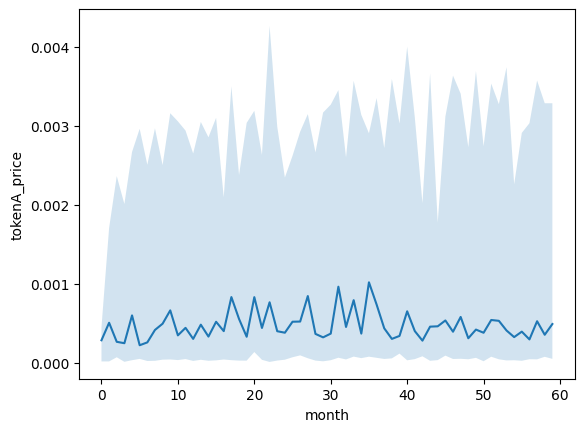

In [4]:
te=TokenEconomy_Basic(holding_time=HoldingTime_Stochastic(),supply=SUPPLY,
                      price_function=PriceFunction_EOE,token='tokenA',
                      price_function_parameters={'noise_addon':AddOn_RandomNoiseProportional(std_param=7)},
                      initial_price=INITIAL_PRICE)

te.add_agent_pools([ap_fiat])
te.add_supply_pool(SupplyController_AdaptiveStochastic())
meta=TokenMetaSimulator(te)
meta.execute(iterations=ITERATIONS,repetitions=50)
reps=meta.get_data()
plot,data=meta.get_timeseries('tokenA_price')
plot

In [5]:
reps

,tokenA_price,transactions_$,num_users,iteration,holding_time,effective_holding_time,supply,transactions_tokenA,repetition_run,iteration_time
0,0.000444,22864000,22864,1,0.388666,0.388666,2.000000e+10,4.572800e+07,0,0
1,0.001300,34362000,34362,2,0.756531,0.756531,2.000000e+10,7.733554e+10,0,1
2,0.002541,37553000,37553,3,1.353324,1.353324,2.000000e+10,2.889147e+10,0,2
3,0.000093,39479000,39479,4,0.370415,0.047163,2.000000e+10,1.553638e+10,0,3
4,0.004235,40863000,40863,5,2.072658,2.072658,2.000000e+10,4.389315e+11,0,4
...,...,...,...,...,...,...,...,...,...,...
55,0.002674,53752000,53752,56,0.994929,0.994929,2.000000e+10,1.852371e+12,49,55
56,0.004806,53841000,53841,57,1.785156,1.785156,2.000000e+10,2.013522e+10,49,56
57,0.001944,53929000,53929,58,0.720962,0.720962,2.000000e+10,1.122181e+10,49,57
58,0.003240,54015000,54015,59,1.199494,1.199494,2.000000e+10,2.778494e+10,49,58


<AxesSubplot:>

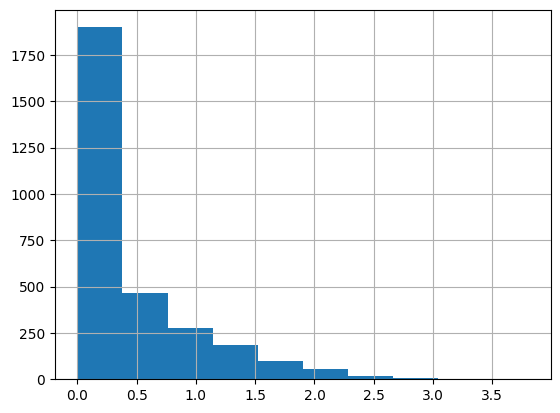

In [6]:
reps.effective_holding_time.hist()

<AxesSubplot:>

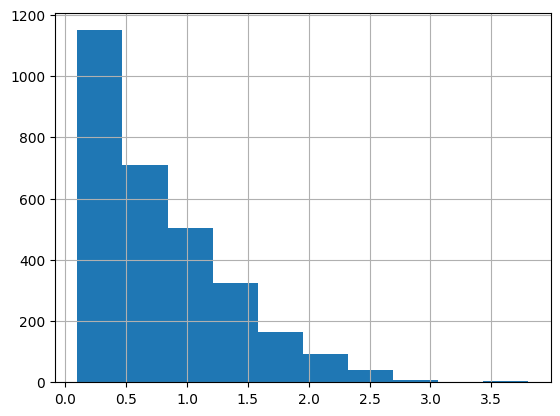

In [7]:
reps.holding_time.hist()

# Add investors that are dumping the token

We can also simulate investor behaviour, where the investors simply decide to dump the token when they get the chance.

This is done through the mechanism of supply pools. These are additional pools (on top of the main supply) that are being executed at every iteration

As you see, as dumping increases, the price converges to values close to 0.



100%|███████████████████████████████████████████| 50/50 [00:01<00:00, 40.67it/s]


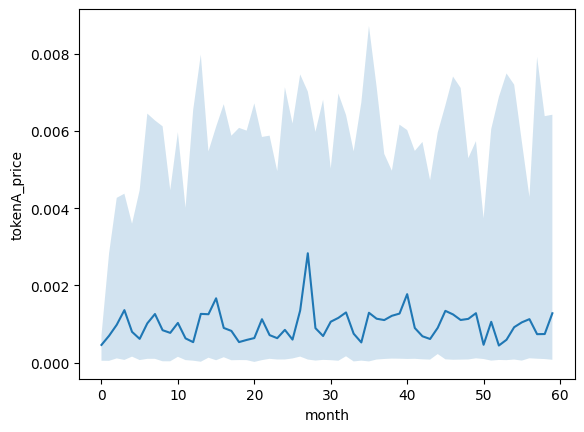

In [8]:
usm_fiat=UserGrowth_Spaced(100,54000,ITERATIONS,log_saturated_space)

ap_fiat=AgentPool_Basic(users_controller=usm_fiat,transactions_controller=1000,currency='$')

investors=SupplyController_InvestorDumperSpaced(dumping_initial=100,dumping_final=500000000,num_steps=ITERATIONS)

te=TokenEconomy_Basic(holding_time=HoldingTime_Stochastic(),supply=SUPPLY,
                      price_function=PriceFunction_EOE,token='tokenA',
                      price_function_parameters={'noise_addon':AddOn_RandomNoiseProportional(std_param=7)},
                      initial_price=INITIAL_PRICE,supply_is_added=False)

te.add_agent_pools([ap_fiat])
te.add_supply_pools([investors])
meta=TokenMetaSimulator(te)
meta.execute(iterations=ITERATIONS,repetitions=50)
reps=meta.get_data()
plot,data=meta.get_timeseries('tokenA_price')
plot

In [9]:
investors.get_dumped_store()

array([      100,   8474675,  16949249,  25423824,  33898398,  42372973,
        50847547,  59322122,  67796697,  76271271,  84745846,  93220420,
       101694995, 110169569, 118644144, 127118719, 135593293, 144067868,
       152542442, 161017017, 169491592, 177966166, 186440741, 194915315,
       203389890, 211864464, 220339039, 228813614, 237288188, 245762763,
       254237337, 262711912, 271186486, 279661061, 288135636, 296610210,
       305084785, 313559359, 322033934, 330508508, 338983083, 347457658,
       355932232, 364406807, 372881381, 381355956, 389830531, 398305105,
       406779680, 415254254, 423728829, 432203403, 440677978, 449152553,
       457627127, 466101702, 474576276, 483050851, 491525425, 500000000])

# Same example but this time with token burn



100%|███████████████████████████████████████████| 50/50 [00:01<00:00, 40.39it/s]


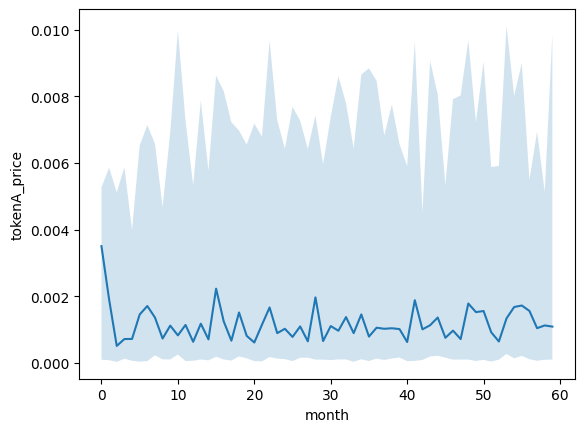

In [10]:
usm_fiat=UserGrowth_Spaced(100,54000,ITERATIONS,log_saturated_space)

ap_fiat=AgentPool_Basic(users_controller=usm_fiat,transactions_controller=1000,currency='$')

investors=SupplyController_InvestorDumperSpaced(dumping_initial=100,dumping_final=500000000,num_steps=ITERATIONS)

burn_mechanism = SupplyController_Burn(burn_param=0.2,burn_style='perc')

te=TokenEconomy_Basic(holding_time=HoldingTime_Stochastic(),supply=SUPPLY,
                      price_function=PriceFunction_EOE,token='tokenA',
                      price_function_parameters={'noise_addon':AddOn_RandomNoiseProportional(std_param=7)},
                      initial_price=INITIAL_PRICE,supply_is_added=False)

te.add_agent_pools([ap_fiat])
te.add_supply_pools([investors,burn_mechanism])
meta=TokenMetaSimulator(te)
meta.execute(iterations=ITERATIONS,repetitions=50)
reps=meta.get_data()
plot,data=meta.get_timeseries('tokenA_price')
plot